# Exercise 1 - Data processing repetition

In this exercise sheet, you will get repetition of data processing using pandas and graphing.

> [!NOTE]
> These exercises covers lecture 00.

## 0. Supahcoolsoft employee data

In a company `Supahcoolsoft`, there are a lot of employees within data fields.

> [!NOTE]
> This is a synthetic dataset generated by GPT-4o, so the information does not reflect reality.

Read this dataset from the data directory and

a) Do some initial EDA on this dataset. For example checking null values, look at some statistical properties.

b) See if there are some null values that you can fill in based on your domain knowledge within the data field.

c) Find out some statistical information about the salary, e.g. mean, median, min, max, 10 percentile and 90 percentile.

d) Group by different roles and take the median and average salaries for each group.

e) Group by different departments and take the median and average salaries for each group.

f) Graph different data engineers salary. There are many approaches to graph this, try different and reason about pros and cons of each you choose.

g) You are getting interview to this company as a junior data analyst, and you have this dataset. Find out some statistical information about that role and similar role to make a case on what salary you should have.

h) Do some additional analysis of your choice.

In [26]:
#0
#a) Do some initial EDA on this dataset. For example checking null values, look at some statistical properties.
import pandas as pd
import numpy as np
df = pd.read_csv('../Data/supahcoolsoft.csv') 
df.head(50)


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24
5,E006,Liam,Wilson,41,IT,Senior Data Analyst,65993.0,liam.wilson@supacoolsoft.se,026-27 51 40
6,E007,Olivia,Brown,46,DevOps,AI Specialist,66996.0,olivia.brown@supacoolsoft.se,0717-03 48 64
7,E008,Astrid,Persson,50,Data Science,Data Scientist,36364.0,astrid.persson@supacoolsoft.se,08-025 34 57
8,E009,Britt,Johansson,47,Engineering,BI Developer,53078.0,britt.johansson@supacoolsoft.se,+46 (0)107 752 69
9,E010,Ove,Larsson,54,Data Science,Junior Data Engineer,44542.0,ove.larsson@supacoolsoft.se,001-648 30 01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   100 non-null    object 
 1   FirstName    100 non-null    object 
 2   LastName     100 non-null    object 
 3   Age          100 non-null    int64  
 4   Department   98 non-null     object 
 5   Position     99 non-null     object 
 6   Salary_SEK   99 non-null     float64
 7   Email        100 non-null    object 
 8   PhoneNumber  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [24]:
missing_data = df[df.isnull().any(axis=1)]
missing_data

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
14,E015,Verner,Eriksson,57,NaN,ETL Developer,46264.0,verner.eriksson@supacoolsoft.se,0810-80 56 25
15,E016,Ruth,Eriksson,47,NaN,Machine Learning Engineer,68611.0,ruth.eriksson@supacoolsoft.se,+46 (0)25 21 81 60
24,E025,Erik,Johansson,34,IT,NaN,52931.0,erik.johansson@supacoolsoft.se,08-22 92 07
69,E070,Emma,Kim,48,DevOps,AI Specialist,NaN,emma.kim@supacoolsoft.se,+46 (0)8 354 130 19


In [27]:
etl_developers = df[df['Position'] == 'ETL Developer'] # kollar vilken avdelning som är vanligast för etl dev
etl_developers

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
14,E015,Verner,Eriksson,57,NaN,ETL Developer,46264.0,verner.eriksson@supacoolsoft.se,0810-80 56 25
23,E024,Kajsa,Arvidsson,48,DevOps,ETL Developer,44109.0,kajsa.arvidsson@supacoolsoft.se,091-511 74 71
47,E048,Vilhelm,Erlandsson,57,Engineering,ETL Developer,35084.0,vilhelm.erlandsson@supacoolsoft.se,08-14 69 30
58,E059,David,Karlsson,40,Data Science,ETL Developer,42951.0,david.karlsson@supacoolsoft.se,0076-410 48
65,E066,Viola,Andersson,31,Engineering,ETL Developer,48533.0,viola.andersson@supacoolsoft.se,+46 (0)472 155 43
68,E069,Gunnar,Eriksson,55,Product Management,ETL Developer,53544.0,gunnar.eriksson@supacoolsoft.se,0589-311 37
72,E073,Liam,Wilson,37,Product Management,ETL Developer,39020.0,liam.wilson@supacoolsoft.se,029-397 34 46
80,E081,Sofia,Nielsen,31,IT,ETL Developer,53455.0,sofia.nielsen@supacoolsoft.se,08-929 953 68
91,E092,Mia,Patel,42,Engineering,ETL Developer,44192.0,mia.patel@supacoolsoft.se,+46 (0)501 810 69


In [28]:
mle = df[df['Position'] == 'Machine Learning Engineer'] # kollar vilken avdelning som är vanligast för machine learning engineer
mle

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
11,E012,Cecilia,Magnusson,58,Data Science,Machine Learning Engineer,56154.0,cecilia.magnusson@supacoolsoft.se,0576-83 25 92
15,E016,Ruth,Eriksson,47,NaN,Machine Learning Engineer,68611.0,ruth.eriksson@supacoolsoft.se,+46 (0)25 21 81 60
40,E041,Maria,Garcia,25,DevOps,Machine Learning Engineer,45451.0,maria.garcia@supacoolsoft.se,0571-862 98
46,E047,Patrik,Johansson,49,IT,Machine Learning Engineer,52337.0,patrik.johansson@supacoolsoft.se,+46 (0)81 44 86 32
55,E056,Robert,Jönsson,49,DevOps,Machine Learning Engineer,41548.0,robert.jönsson@supacoolsoft.se,+46 (0)994 940 25
74,E075,Wei,Zhang,32,DevOps,Machine Learning Engineer,68086.0,wei.zhang@supacoolsoft.se,+46 (0)586 920 24
76,E077,Elias,Engström,48,Engineering,Machine Learning Engineer,51275.0,elias.engström@supacoolsoft.se,090-61 85 40
84,E085,Margaretha,Lundin,40,DevOps,Machine Learning Engineer,41833.0,margaretha.lundin@supacoolsoft.se,08-343 45 95


In [32]:
Itpeople = df[df['Department'] == 'IT']
Itpeople

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
5,E006,Liam,Wilson,41,IT,Senior Data Analyst,65993.0,liam.wilson@supacoolsoft.se,026-27 51 40
22,E023,Maria,Garcia,31,IT,Big Data Engineer,60579.0,maria.garcia@supacoolsoft.se,+46 (0)8 058 790 94
24,E025,Erik,Johansson,34,IT,NaN,52931.0,erik.johansson@supacoolsoft.se,08-22 92 07
27,E028,Christina,Svensson,52,IT,Junior Data Scientist,47746.0,christina.svensson@supacoolsoft.se,+46 (0)479 099 78
32,E033,Maria,Garcia,29,IT,Junior Data Scientist,41412.0,maria.garcia@supacoolsoft.se,0613-858 88
35,E036,Niklas,Karlsson,40,IT,Database Administrator,54033.0,niklas.karlsson@supacoolsoft.se,0795-862 69
36,E037,Olivia,Brown,54,IT,BI Developer,52655.0,olivia.brown@supacoolsoft.se,081-63 55 27
39,E040,Emma,Kim,53,IT,AI Specialist,65553.0,emma.kim@supacoolsoft.se,0946-74 42 27
45,E046,Liam,Wilson,57,IT,Senior Data Analyst,52336.0,liam.wilson@supacoolsoft.se,+46 (0)74 98 17 56
46,E047,Patrik,Johansson,49,IT,Machine Learning Engineer,52337.0,patrik.johansson@supacoolsoft.se,+46 (0)81 44 86 32


In [33]:
it_people_sorted = Itpeople.sort_values(by='Position')
it_people_sorted

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
39,E040,Emma,Kim,53,IT,AI Specialist,65553.0,emma.kim@supacoolsoft.se,0946-74 42 27
36,E037,Olivia,Brown,54,IT,BI Developer,52655.0,olivia.brown@supacoolsoft.se,081-63 55 27
22,E023,Maria,Garcia,31,IT,Big Data Engineer,60579.0,maria.garcia@supacoolsoft.se,+46 (0)8 058 790 94
50,E051,Mia,Patel,41,IT,Data Scientist,57326.0,mia.patel@supacoolsoft.se,+46 (0)39 27 25 65
35,E036,Niklas,Karlsson,40,IT,Database Administrator,54033.0,niklas.karlsson@supacoolsoft.se,0795-862 69
80,E081,Sofia,Nielsen,31,IT,ETL Developer,53455.0,sofia.nielsen@supacoolsoft.se,08-929 953 68
92,E093,Mia,Patel,42,IT,Junior Data Analyst,33401.0,mia.patel@supacoolsoft.se,083-946 68 56
93,E094,Fatima,Khan,35,IT,Junior Data Analyst,36776.0,fatima.khan@supacoolsoft.se,007-70 46 39
27,E028,Christina,Svensson,52,IT,Junior Data Scientist,47746.0,christina.svensson@supacoolsoft.se,+46 (0)479 099 78
32,E033,Maria,Garcia,29,IT,Junior Data Scientist,41412.0,maria.garcia@supacoolsoft.se,0613-858 88


In [34]:
devops_ai_specialists = df[(df['Department'] == 'DevOps') & (df['Position'] == 'AI Specialist')]
devops_ai_specialists


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
6,E007,Olivia,Brown,46,DevOps,AI Specialist,66996.0,olivia.brown@supacoolsoft.se,0717-03 48 64
60,E061,Margareta,Berglund,28,DevOps,AI Specialist,69356.0,margareta.berglund@supacoolsoft.se,088-747 36 50
69,E070,Emma,Kim,48,DevOps,AI Specialist,NaN,emma.kim@supacoolsoft.se,+46 (0)8 354 130 19


In [37]:
mean_salary = devops_ai_specialists['Salary_SEK'].mean()
print(mean_salary)

68176.0


In [38]:
# b) See if there are some null values that you can fill in based on your domain knowledge within the data field.

# lägger in e015 och e016 på andra avdelningar
df.loc[df['EmployeeID'] == 'E015', 'Department'] = 'Engineering' 
df.loc[df['EmployeeID'] == 'E016', 'Department'] = 'DevOps'
# lägger till e025 som senior data analyst då den är verkar vara vanligast.
df.loc[df['EmployeeID'] == 'E025', 'Position'] = 'Senior Data Analyst'
# lägger in medellön på sista saknade baserat på de andra ai specialisterna i devops avdelningen
df.loc[(df['EmployeeID'] == 'E070'), 'Salary_SEK'] = mean_salary





In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   100 non-null    object 
 1   FirstName    100 non-null    object 
 2   LastName     100 non-null    object 
 3   Age          100 non-null    int64  
 4   Department   100 non-null    object 
 5   Position     100 non-null    object 
 6   Salary_SEK   100 non-null    float64
 7   Email        100 non-null    object 
 8   PhoneNumber  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [48]:
# c) Find out some statistical information about the salary, e.g. mean, median, min, max, 10 percentile and 90 percentile.

mean_salary_all = df['Salary_SEK'].mean()
median_salary_all = df['Salary_SEK'].median()
min_salary = df['Salary_SEK'].min()
max_salary = df['Salary_SEK'].max()
percentile_10 = df['Salary_SEK'].quantile(0.10)
percentile_90 = df['Salary_SEK'].quantile(0.90)
print(f"Mean: {mean_salary_all}, Median: {median_salary_all}, Min: {min_salary}, max: {max_salary}, 10%: {percentile_10}, 90%: {percentile_90}")


Mean: 52210.45, Median: 52925.0, Min: 30452.0, max: 69742.0, 10%: 36563.8, 90%: 67249.90000000001


In [50]:
df.head(10)


,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24
5,E006,Liam,Wilson,41,IT,Senior Data Analyst,65993.0,liam.wilson@supacoolsoft.se,026-27 51 40
6,E007,Olivia,Brown,46,DevOps,AI Specialist,66996.0,olivia.brown@supacoolsoft.se,0717-03 48 64
7,E008,Astrid,Persson,50,Data Science,Data Scientist,36364.0,astrid.persson@supacoolsoft.se,08-025 34 57
8,E009,Britt,Johansson,47,Engineering,BI Developer,53078.0,britt.johansson@supacoolsoft.se,+46 (0)107 752 69
9,E010,Ove,Larsson,54,Data Science,Junior Data Engineer,44542.0,ove.larsson@supacoolsoft.se,001-648 30 01


In [52]:
# d) Group by different roles and take the median and average salaries for each group.
unique_positions = df['Position'].unique()
print(unique_positions)

['AI Specialist' 'Database Administrator' 'Data Scientist'
 'Junior Data Scientist' 'Senior Data Analyst' 'BI Developer'
 'Junior Data Engineer' 'Machine Learning Engineer' 'ETL Developer'
 'Senior Data Scientist' 'Big Data Engineer' 'Junior Data Analyst'
 'Senior Data Engineer' 'Data Architect']


In [54]:
# Grupperar på Position med hjälp av .groupby() 
# agg(['median', 'mean']) Använder agg()-metoden för att tillämpa flera aggregeringsfunktioner (median och medelvärde) på de grupperade datagrupperna.
# ['median', 'mean']: Specificerar att man vill beräkna både medianen och medelvärdet för Salary_SEK i varje grupp.
salary_stats = df.groupby('Position')['Salary_SEK'].agg(['median', 'mean'])
print(salary_stats)

                            median          mean
Position                                        
AI Specialist              64744.0  62904.888889
BI Developer               48608.5  48276.000000
Big Data Engineer          57958.0  57958.000000
Data Architect             60572.0  59525.600000
Data Scientist             51919.0  51722.333333
Database Administrator     48482.0  47706.800000
ETL Developer              44192.0  45239.111111
Junior Data Analyst        34877.5  35195.300000
Junior Data Engineer       41905.0  40000.200000
Junior Data Scientist      43595.5  43813.125000
Machine Learning Engineer  51806.0  53161.875000
Senior Data Analyst        56303.0  58072.636364
Senior Data Engineer       65740.0  64918.750000
Senior Data Scientist      65526.0  64451.857143


In [55]:
# e) Group by different departments and take the median and average salaries for each group.

salary_stats_dep = df.groupby('Department')['Salary_SEK'].agg(['median', 'mean'])
print(salary_stats_dep)


                     median          mean
Department                               
Data Science        47256.5  50978.625000
DevOps              49129.0  52695.428571
Engineering         48482.0  48321.714286
IT                  53193.0  53585.062500
Product Management  53772.0  54871.769231


In [60]:
# f) Graph different data engineers salary. There are many approaches to graph this, try different and reason about pros and cons of each you choose.
data_engineers_df = df[df['Position'].str.contains('Data Engineer')]
data_engineers_df

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
9,E010,Ove,Larsson,54,Data Science,Junior Data Engineer,44542.0,ove.larsson@supacoolsoft.se,001-648 30 01
10,E011,Fatima,Khan,41,DevOps,Junior Data Engineer,33563.0,fatima.khan@supacoolsoft.se,0103-338 33
17,E018,Gustaf,Jönsson,50,Product Management,Junior Data Engineer,41905.0,gustaf.jönsson@supacoolsoft.se,08-938 153 46
22,E023,Maria,Garcia,31,IT,Big Data Engineer,60579.0,maria.garcia@supacoolsoft.se,+46 (0)8 058 790 94
30,E031,Lennart,Dahlberg,55,DevOps,Senior Data Engineer,65831.0,lennart.dahlberg@supacoolsoft.se,08-249 500 00
34,E035,Margareta,Lilja,34,Data Science,Senior Data Engineer,67163.0,margareta.lilja@supacoolsoft.se,051-48 58 04
49,E050,Maria,Garcia,56,DevOps,Big Data Engineer,55337.0,maria.garcia@supacoolsoft.se,+46 (0)152 731 00
52,E053,Sophia,Martinez,59,Product Management,Senior Data Engineer,61093.0,sophia.martinez@supacoolsoft.se,08-081 47 09
54,E055,Sophia,Martinez,39,Product Management,Senior Data Engineer,65649.0,sophia.martinez@supacoolsoft.se,08-989 394 08
66,E067,Gun,Jakobsson,60,Data Science,Senior Data Engineer,66441.0,gun.jakobsson@supacoolsoft.se,+46 (0)573 836 26


C:\Users\utjis\AppData\Local\Temp\ipykernel_15504\4043180677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salary_SEK', y='Position', data=data_engineers_df, palette='viridis')


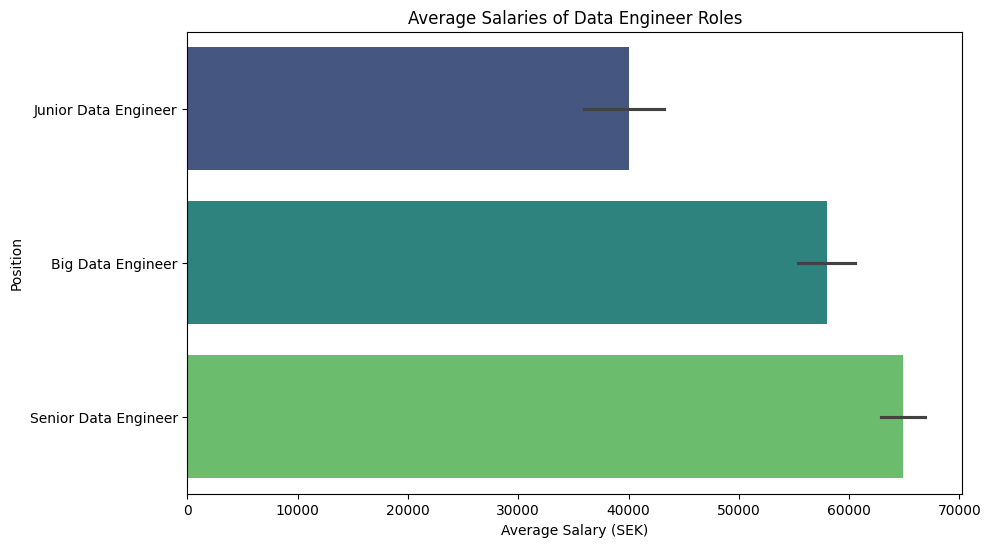

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrerar df för att endast behålla rader där jobbtiteln innehåller "Data Engineer".
# Grupperar de filtrerade raderna efter jobbtitel.
# Beräknar medellönen (mean()) för varje jobbtitel.
# Återställer tabellens index så att resultaten är i en ny DataFrame med ett ordnat format.

data_engineers_avg_df = df[df['Position'].str.contains('Data Engineer')].groupby('Position')['Salary_SEK'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Salary_SEK', y='Position', data=data_engineers_df, palette='viridis')

plt.title('Average Salaries of Data Engineer Roles')
plt.xlabel('Average Salary (SEK)')
plt.ylabel('Position')

plt.show()


In [81]:
data_engineers_avg_df

,Position,Salary_SEK
0,Big Data Engineer,57958.00
1,Junior Data Engineer,40000.20
2,Senior Data Engineer,64918.75


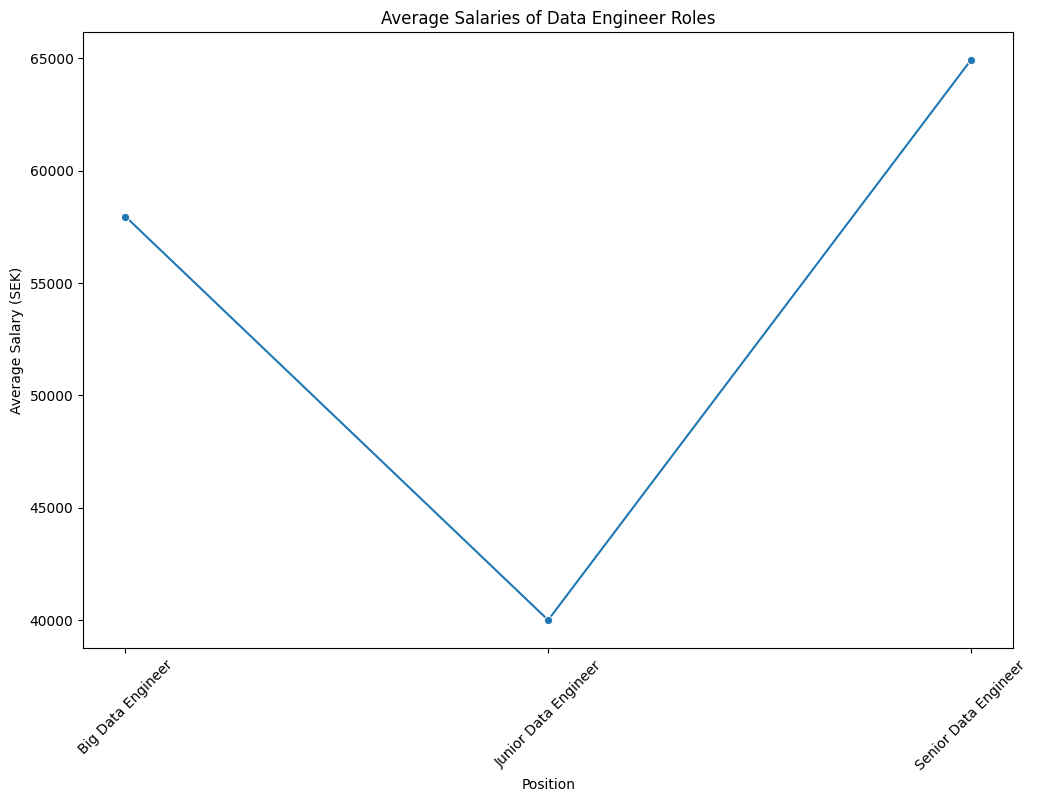

In [71]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Position', y='Salary_SEK', data=data_engineers_avg_df, marker='o')

plt.title('Average Salaries of Data Engineer Roles')
plt.xlabel('Position')
plt.ylabel('Average Salary (SEK)')
plt.xticks(rotation=45)  # För att göra x-axel etiketter läsliga

plt.show()

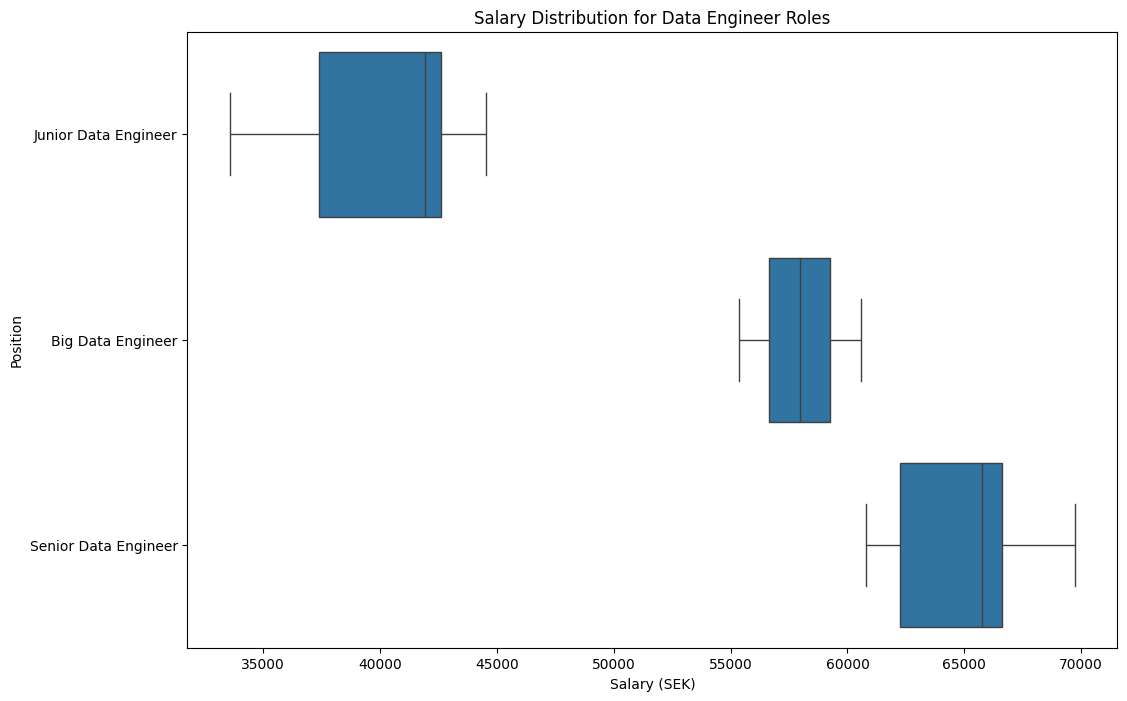

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary_SEK', y='Position', data=df[df['Position'].str.contains('Data Engineer')])

plt.title('Salary Distribution for Data Engineer Roles')
plt.xlabel('Salary (SEK)')
plt.ylabel('Position')

plt.show()

In [91]:
# g) You are getting interview to this company as a junior data analyst, and you have this dataset. Find out some statistical information about that role and similar role to make a case on what salary you should have.
# 33000-35000 i lön medel är 35000

junior_data_analyst = df[df['Position'].str.contains('Junior Data Analyst')]['Salary_SEK']
junior_data_analyst

29    34687.0
42    39892.0
43    37471.0
48    35068.0
57    30452.0
61    32045.0
70    33983.0
77    38178.0
92    33401.0
93    36776.0
Name: Salary_SEK, dtype: float64

In [80]:
#medelvärde junior data analyst
mean_jun_dat_anal = df[df['Position'].str.contains('Junior Data Analyst')]['Salary_SEK'].mean()
print(mean_jun_dat_anal)

35195.3


In [86]:
# medelvärde på alla data analysts
data_analysts = df[df['Position'].str.contains('Data Analyst')]['Salary_SEK'].mean()
print(data_analysts)

47178.666666666664




## 1. Olympic games in Paris 2024

Here is the [wikipedia page for olympic games in paris 2024](https://en.wikipedia.org/wiki/2024_Summer_Olympics). We will use it for some data analysis. We'll use pandas `pd.read_html()` to scrape different tables in this site.

&nbsp; a) How many sports are represented in total?

For b,c,d it's good to make functions that can be reused.

&nbsp; b) Make a bar chart over the top five countries in medal count.

&nbsp; c) Make a bar chart over the top five countries in gold medal count.

&nbsp; d) Choose a sport from and and make a bar chart over top five countries.

Note that there are several tables that need to be considered for these tasks and some data cleaning are required.

&nbsp; e) How many venues are there in total?

&nbsp; f) How many venues were built for the games?

&nbsp; g) How much capacity does this correspond to?

&nbsp; h) How much percentage of capacity does this correspond to in total?

## 2. Working with livsmedelsverkets API

Livsmedelsverket provides an open API for accessing data on different food and their nutritional contents and more. Access the [documentation of this API here](https://dataportal.livsmedelsverket.se/livsmedel/swagger/index.html).

&nbsp; a) Go into different sections and click `Try it out` to try out the API, and you'll get the request URL links.

&nbsp; b) Now go into this endpoint `/api/v{version}/livsmedel/{nummer}` and try it out to find its request URL.

&nbsp; c) Use requests in python to try out this API endpoint and request a few data points.

&nbsp; d) Now find a number and find and print out its corresponding nutrient values. Example for number 10. Filter out all nutrients that are 0. 

```
Namn
Flytande margarin fett 82% berikad typ Milda culinesse

Näringsvärden
Vitamin E                               23.7mg
Vitamin D                               7.5µg
Vitamin A                               693.1RE/µg
Vatten                                  16.7g
Retinol                                 645.0µg
Summa fleromättade fettsyror            28.7g
Salt, NaCl                              1.5g
Natrium, Na                             600mg
Summa enkelomättade fettsyror           42.5g
Summa mättade fettsyror                 7.3g
Fett, totalt                            82.0g
Energi (kJ)                             3034kJ
Energi (kcal)                           725kcal
Arakidinsyra C20:0                      0.6g
Linolensyra C18:3                       8.8g
Linolsyra C18:2                         19.8g
Oljesyra C18:1                          41.0g
Stearinsyra C18:0                       2.1g
Palmitoljesyra C16:1                    0.2g
Palmitinsyra C16:0                      3.6g
Myristinsyra C14:0                      0.1g
Betakaroten/β-Karoten                   577µg
Aska                                    1.3g
```

This requires some more steps, but can be fun to explore. 

&nbsp; e) Make a dictionary of names as key and number as value. Then implement embeddings that finds closest distance between two strings. Now you can search for a specific food and find the closest one in your dictionary. Use the value that is a number and search for its corresponding nutrients. 

## 3. Theory questions

These study questions are good to get an overview of how snowflake works.

&nbsp; a) When should you use median over mean in statistics?

&nbsp; b) Salary for 90th percentile is 40000, what does this mean?

&nbsp; c) What are the main data structures used in pandas, and what are their primary use cases?

&nbsp; d) How does a pandas Series differ from a DataFrame, and when would you choose to use each?

&nbsp; e) Describe the various ways to select and filter data in a pandas DataFrame. How do these methods differ?

&nbsp; f) What are the differences between .loc[], .iloc[]? When should each be used?

&nbsp; g) How can you transform data in a pandas DataFrame using apply(), map(), and applymap()? What are the differences between these methods?

&nbsp; h) Why should you in general not loop through a dataframe? What can you do instead?

&nbsp; i) What type of ways are there to create dataframes in pandas?

## Glossary

Fill in this table either by copying this into your own markdown file or copy it into a spreadsheet if you feel that is easier to work with.

| terminology    | explanation |
| -------------- | ----------- |
| series         |             |
| dataframe      |             |
| concatenation  |             |
| join           |             |
| merge          |             |
| synthetic data |             |
| API            |             |
| clutter        |             |
| endpoint       |             |
| get request    |             |
| response       |             |
| json           |             |
| REST           |             |
| payload        |             |
| imputation     |             |
| aggregation    |             |
| data cleaning  |             |
| EDA            |             |
| outliers       |             |
| index (pandas) |             |
|                |             |